In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

# Finding the best hyper-parameters

Some text about finding hyper-parameters.

# Fetch the data and load it

This is a repeat of the previous notebook. Downloads the data and fits a simple decision tree classifier.

In [2]:
import os
from urllib.request import urlretrieve

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/adult/adult.data")
local_filename = os.path.basename(url)
if not os.path.exists(local_filename):
    print("Downloading Adult Census datasets from UCI")
    urlretrieve(url, local_filename)

In [3]:
names = ("age, workclass, fnlwgt, education, education-num, "
         "marital-status, occupation, relationship, race, sex, "
         "capital-gain, capital-loss, hours-per-week, "
         "native-country, income").split(', ')    
data = pd.read_csv(local_filename, names=names)

In [4]:
target = data['income']
features_data = data.drop('income', axis=1)
features = pd.get_dummies(features_data)

In [5]:
X = features.values.astype(np.float32)
y = (target.values == ' >50K').astype(np.int32)

In [6]:
from sklearn.model_selection import train_test_split

X_dev, X_eval, y_dev, y_eval = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=8)

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_dev, y_dev, cv=5, scoring='roc_auc')
print("ROC AUC Decision Tree: {:.4f} +/-{:.4f}".format(
      np.mean(scores), np.std(scores)))

ROC AUC Decision Tree: 0.9000 +/-0.0018


# Tuning your estimator

Hyper-parameters are not directly learnt by the classifier or regressor from the data. They need setting from the outside. An example of a hyper-parameter is `max_depth` for a decision tree classifier. In `scikit-learn` you can spot them as the parameters that are passed to the constructor of your estimator.

The best value of a hyper-parameter depends on the kind of problem you are solving:

* how many features and samples do you have?
* mostly numerical or mostly categorical features?
* is it a regression or classification task?

Therefore you should optimise the hyper-parameters for each problem, otherwise the performance of your classifier will not be as good as it could be.

## Search over a grid of parameters

This is the simplest strategy: you try every combination of values for each hyper-parameter.

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [1, 2, 4, 8, 16, 32]}
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='roc_auc')

In [64]:
grid_search.fit(X_dev, y_dev)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 4, 8, 16, 32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

### Question

Print out the values of `max_depth` tried, and the average train and test scores for each.

(Try and retrieve the `max_depth` values from the `grid_search` object, not the parameter grid.)

In [78]:
# %load solutions/grid_search_list_values.py

### Question

Compare the test and train performance at for each value of `max_depth` to that obtained from the previous validation curve example by making a plot similar to `plot_validation_curve`.


In [77]:
# %load solutions/grid_search_max_depth.py

### Question

Extend the parameter grid to also search over different values for the `max_features` hyper-parameter. (Try: 3, 6, 12, 24, 48, and 96 if you need inspiration)

In [ ]:
# %load solutions/grid_search_max_depth_and_max_features.py

### Question

How many different models/hyper-parameter combinations did you just evaluate? What are the best three combinations? (Should you rank by train or test score?)

In [79]:
# %load solutions/grid_search_best_three.py

### Question

Reuse your plotting from before to show how the score varies as a function of `max_depth`. Do you notice how we repeatedly evaluate the classifier at the same value of `max_depth`?

In [80]:
#plot_grid_scores("max_depth", grid_search.cv_results_)

## Random grid search

An alternative to the exhaustive grid search is to sample parameter values at random. This has two main benefits over an exhaustive search:
* A budget can be chosen independent of the number of parameters and possible values.
* Adding parameters that do not influence the performance does not decrease efficiency.

In [83]:
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV

param_grid = {"max_depth": sp_randint(1, 32),
              "max_features": sp_randint(1, 96),}
random_search = RandomizedSearchCV(clf, param_distributions=param_grid,
                                 n_iter=36, scoring='roc_auc')
random_search.fit(X_dev, y_dev)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=36, n_jobs=1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1178cbda0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1178cbe80>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

Best test score: 0.8844


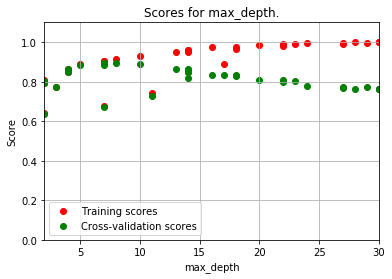

In [84]:
plot_grid_scores("max_depth", random_search.cv_results_)

For the same number of model evaluations you get a much better view of how the performance varies as a function of `max_depth`.